In [3]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def triaxial_strain(c, beta=3.37):
    """Produce both the displacement and hopping energy modifier"""
    @pb.site_position_modifier
    def displacement(x, y, z):
        ux = 2*c * x*y
        uy = c * (x**2 - y**2)
        return x + ux, y + uy, z

    @pb.hopping_energy_modifier
    def strained_hopping(energy, x1, y1, z1, x2, y2, z2):
        l = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
        w = l / graphene.a_cc - 1
        return energy * np.exp(-beta*w)

    return displacement, strained_hopping


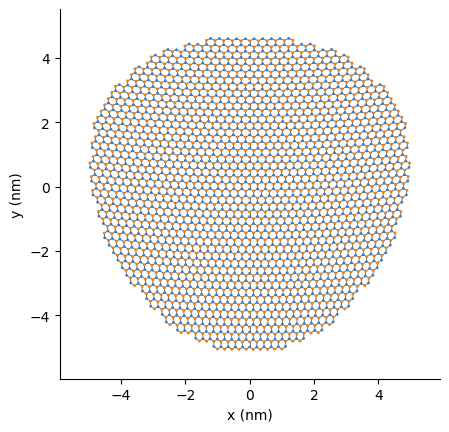

In [26]:
from pybinding.repository import graphene

from math import pi

model = pb.Model(
    graphene.monolayer(),
    pb.circle(radius=5),
    triaxial_displacement(c=0.05)
)
model.plot()


In [31]:
cond = kpm.calc_conductivity(np.linspace(-1, 1, 100), broadening=0.03, temperature=300)


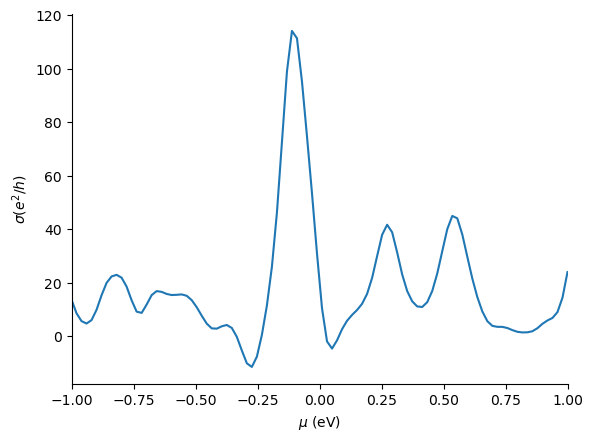

In [32]:
cond.plot()

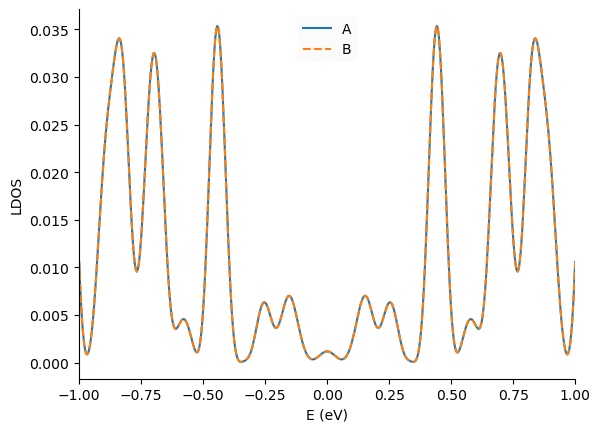

In [27]:
kpm = pb.kpm(model)

for sub_name in ['A', 'B']:
    ldos = kpm.calc_ldos(energy=np.linspace(-1, 1, 500), broadening=0.03,
                         position=[0, 0], sublattice=sub_name)
    ldos.plot(label=sub_name, ls="--" if sub_name == "B" else "-")
pb.pltutils.legend()
